* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2022 </i></pre>
* * *


<h1 align="center"> Lab 11: Graphs and networks in machine learning  </h1>

<pre align="left"> November 10th 2022               <i> Author: Hicham Janati </i></pre>
* * *





# Part I: Introduction to Networkx

Networks (or graphs) are a very powerful tool through which one can model relationships and structure data with a lot of flexibility. A graph is a collection of nodes (elements of some set) that may or may not be connected by an edge. The purpose of this first section is to get familiar with manipulating graphs using Networkx. We start with a simple examples of the parisian subway:
![metro](img/metro.png)


In [4]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Question 1
Read and run the following code multiple times. What do you notice ?

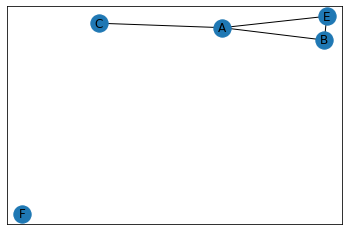

In [2]:
G = nx.Graph()

G.add_edge("A", "B", somedata=1)
G.add_node("F")
G.add_edge("C", "A", somedata=1)
G.add_edge("E", "A", somedata=10)
G.add_edge("E", "B", somedata=1)

nx.draw_networkx(G)

### Question 2
We can add any data to an edge by appending keywords like this:

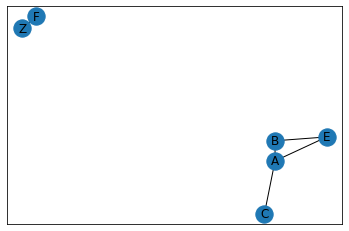

In [3]:
G.add_edge("F", "Z", weight=15., somedata=403, someotherdata="somevalue")
G.add_edge("A", "B", weight=10., somedata=300, someotherdata="someothervalue")

nx.draw_networkx(G)

This additional data can be obtained from the edge:

In [4]:
G.get_edge_data("F", "Z")

{'weight': 15.0, 'somedata': 403, 'someotherdata': 'somevalue'}

As well as for all the edges and a specific variable:

In [5]:
nx.get_edge_attributes(G, "somedata")

{('A', 'B'): 300,
 ('A', 'C'): 1,
 ('A', 'E'): 10,
 ('B', 'E'): 1,
 ('F', 'Z'): 403}

Create a graph `M` where the nodes are the stations in the image above (you can ignore Line 12 for the sake of simplicity). Add a `time` and `distance` variables for all edges using the time (mn) and distance (meters) conventions:
- metro change: 1 | 100
- metro-metro: 2 | 1500
- RER-RER: 2 | 2000
- RER change: 4 | 200


### Question 3
The function `nx.shortest_path` provides the list of nodes that constitute the shortest path between two given nodes:

In [6]:
nx.shortest_path(G, "E", "C")

['E', 'A', 'C']

In [7]:
nx.shortest_path_length(G, "E", "C")

2

Compute the shortest path (and its length) between "Saint-Sulpice" and "Clunny". Check the documentation of these functions to select the appropriate criterion. Is the shortest path in time and distance the same ?


### Question 4
To draw the graph with edge lengths respecting the given data, you need to first generate node positions using the data:

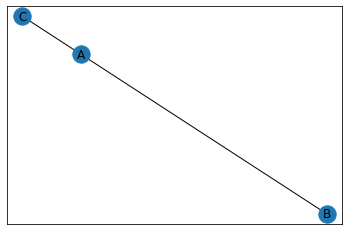

In [52]:
G = nx.Graph()

G.add_edge("A", "B", somedata=1)
G.add_edge("A", "C", somedata=50)

positions = nx.spring_layout(G, weight="somedata")
nx.draw_networkx(G, positions)

Draw the metro graph with both criteria.  You can add edge labels (with your data attribute) using: `nx.draw_networkx_edge_labels` as shown below. Does the shortest path make sense visually ? Propose an idea to fix the counter-intuitive displayed labeling.

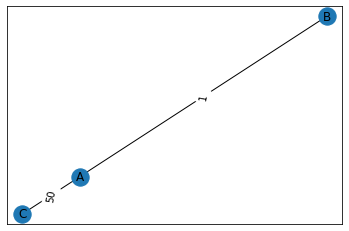

In [79]:
G = nx.Graph()

G.add_edge("A", "B", somedata=1)
G.add_edge("A", "C", somedata=50)


positions = nx.spring_layout(G, weight="somedata")

edge_data = nx.get_edge_attributes(G, "somedata")
nx.draw_networkx_edge_labels(G, positions, edge_data)
nx.draw_networkx(G, positions)

In [77]:
G.degree()

DegreeView({'A': 3, 'B': 3, 'C': 2, 'E': 2, 'F': 2, 'R': 2})

# Part II: graph clustering

We start by introducing two concepts:

### A)  - Betweeness centrality
The shortest path between nodes can be used to define the concept (quantity) of betweeness centrality of an edge. An edge has high _betweeness centrality_ if among all possible shortest paths between _all_ the nodes of the graph
a large proportion includes it. Consider the case of a network with two islands linked by a bridge. The edge conssituting the bridge would be present in any shortest path between nodes from different islands:

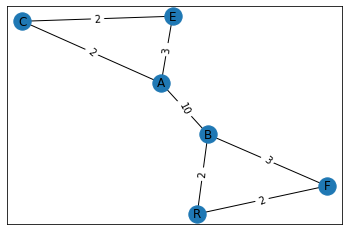

In [93]:
G = nx.Graph()

G.add_edge("A", "B", somedata=10)
G.add_edge("A", "C", somedata=2)

G.add_edge("A", "E", somedata=3)
G.add_edge("E", "C", somedata=2)

G.add_edge("B", "F", somedata=3)
G.add_edge("B", "R", somedata=2)
G.add_edge("F", "R", somedata=2)

positions = nx.spring_layout(G, weight="somedata")

edge_data = nx.get_edge_attributes(G, "somedata")
nx.draw_networkx_edge_labels(G, positions, edge_data)
nx.draw_networkx(G, positions)

In [91]:
nx.betweenness_centrality(G, weight="somedata")

{'A': 0.6000000000000001,
 'B': 0.6000000000000001,
 'C': 0.0,
 'E': 0.4,
 'F': 0.0,
 'R': 0.0}

### B) - Node importance
The importance (or degree) of a node can be defined as the total number of edges (weighted or not) it has. We can display nodes with size proportional to their importance. The argument `nodelist` can also be used to plot a subset of the graph.

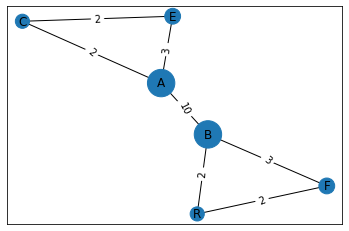

In [94]:
importance = dict(G.degree(weight="somedata"))
nodelist = list(importance.keys())
sizes = 50 * np.array([importance[key] for key in nodelist])
nx.draw_networkx_edge_labels(G, positions, edge_data)
nx.draw_networkx(G, positions, nodelist=nodelist, node_size=sizes)

 This notion can be used to `prune` a graph and detect communities. Starting from a graph, the Girvan Newman algorithm loops over all edges and removes the "most important edge" at each iteration until no edges are left. The obtained  result can be thought of as a "tree".

## Game of thrones communities

You are now ready to apply this concepts to a real dataset consisting of interactions between Game of thrones characters. Two characters (nodes) interact if they are mentioned within 15 consecutive words in a GOT book.

In [2]:
import pandas as pd
df = pd.read_csv("asoiaf/data/asoiaf-book1-edges.csv")
df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [5]:
def got_graph(book_id):
    df = pd.read_csv(f"https://aiteachings.github.io/NYU-AI-Fall22/static_files/data/got/asoiaf-book{book_id}-edges.csv")
    graph = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr=['weight'])
    return df

graph = got_graph(1)

We create a graph from this edges datasets:

### Question 5:
Find the top 10 important characters.

_Tip: Find a smart way to sort a dictionary by looking up the extra args of `dict`_

### Question 6:
Visualize the graph of the top 10 important characters.

_Tip: Create a subgraph_.

### Question 7
Read the dataset of the five books. Does this top 10 evolve as expected from the series ?

### Question 8
Repeat question 6-7 but for the betweeness-centrality score. Does it make sense to use `weight` here ?

### Question 9
Run the girvan newman algorithm and visualize the graph of each community (top 5 important characters of each community). Do the communities make sense from a story perspective ?

In [6]:
from networkx.algorithms.community.centrality import girvan_newman